Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [3]:
# Import required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

### Q1. Load the dataset 

In [5]:
df=pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992000,157.302000,74.997000,0.007840,0.000070,0.003700,0.005540,0.011090,0.043740,0.426000,0.021820,0.031300,0.029710,0.065450,0.022110,21.033000,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,0.031340,0.045180,0.043680,0.094030,0.019290,19.085000,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682000,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.482000,0.027570,0.038580,0.035900,0.082700,0.013090,20.651000,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.517000,0.029240,0.040050,0.037720,0.087710,0.013530,20.644000,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,0.034900,0.048250,0.044650,0.104700,0.017670,19.649000,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


**inference**:

1. count of all the features are same, so we can conclude that there is no missing values



### Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [10]:
#plotting countplot toc check class imbalance in status
df1=df['status'].value_counts()
df1

1    147
0     48
Name: status, dtype: int64

In [17]:
len(df1)

2

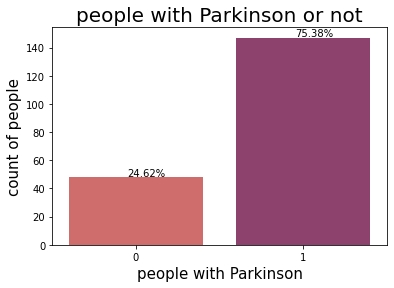

In [27]:
sns.barplot(df1.index , df1.values,palette='flare')
plt.xlabel('people with Parkinson',fontsize=15)
plt.ylabel('count of people',fontsize=15)
plt.title('people with Parkinson or not',fontsize=20)
plt.text(x=-0.05 ,y=df.status.value_counts()[0]+1,s=str(round((df.status.value_counts()[0])*100/(len(df)),2))+'%')
plt.text(x=0.95 ,y=df.status.value_counts()[1]+1,s=str(round((df.status.value_counts()[1])*100/(len(df)),2))+'%')
plt.show()

In [28]:
#there is imbalance in the status and people with Parkinson's have greater representation in the dataset

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [31]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

In [42]:
plt.rcParams['figure.figsize']=[15,12]

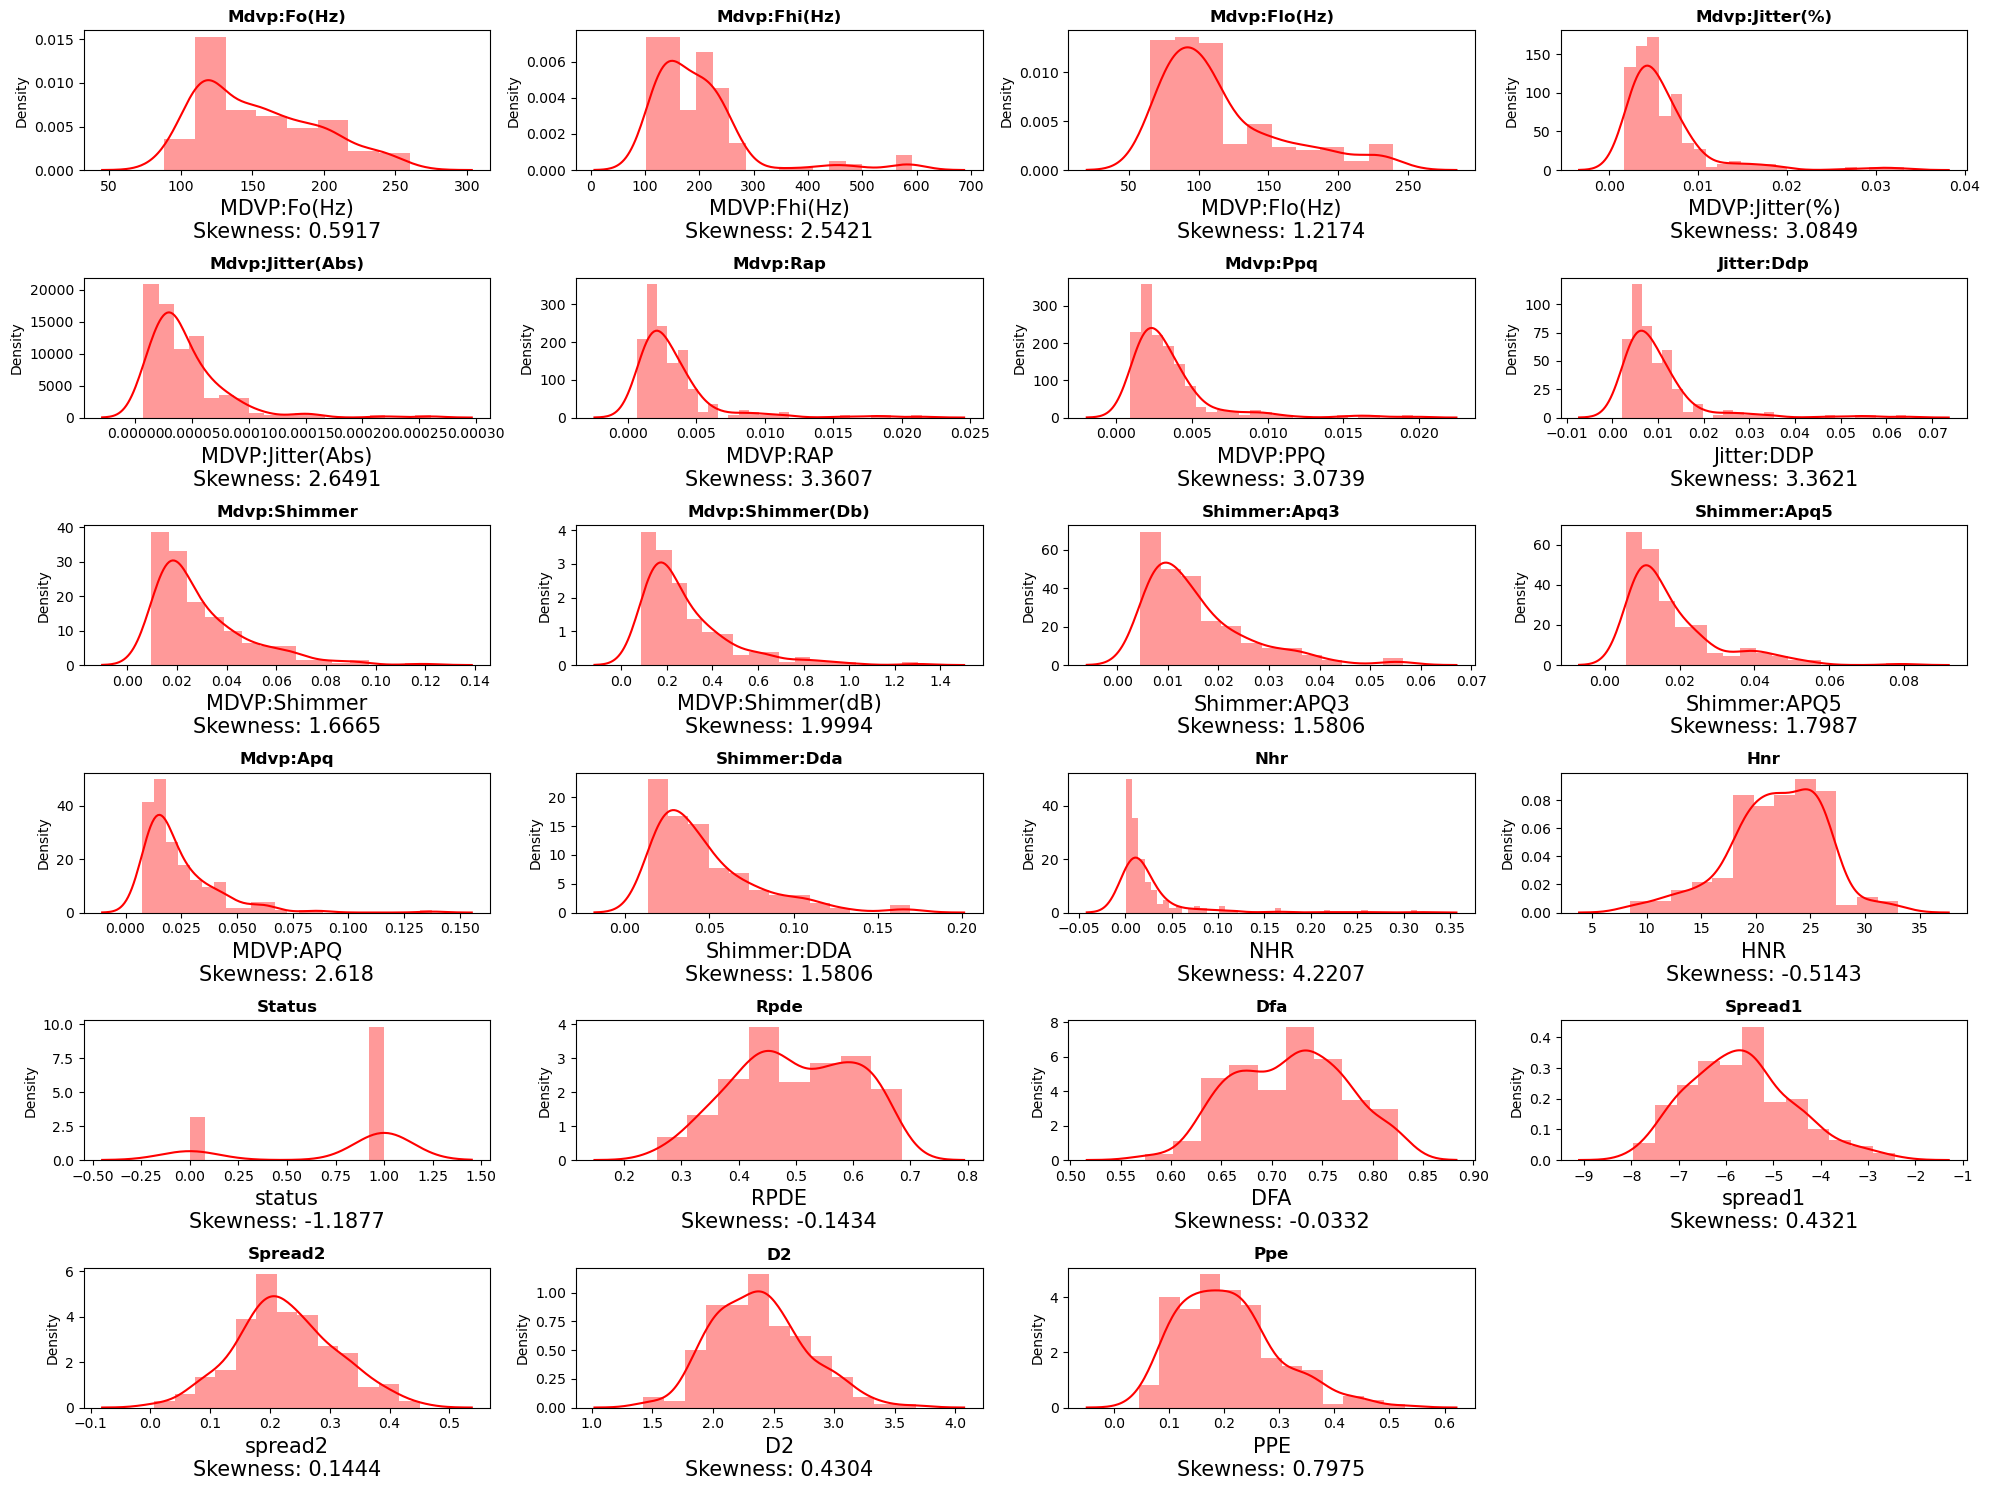

In [73]:
plt.figure(figsize=(20,15),dpi=100)
n=1
for i in df.describe().columns:
    plt.subplot(6,4,n)
    n+=1
    sns.distplot(df[i],color='Red')
    plt.title(f'{i.title()}',weight='bold')
    plt.xlabel(f"{i}\nSkewness: {round(df[i].skew(),4)}",fontsize=15)
    plt.tight_layout()
plt.show()

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

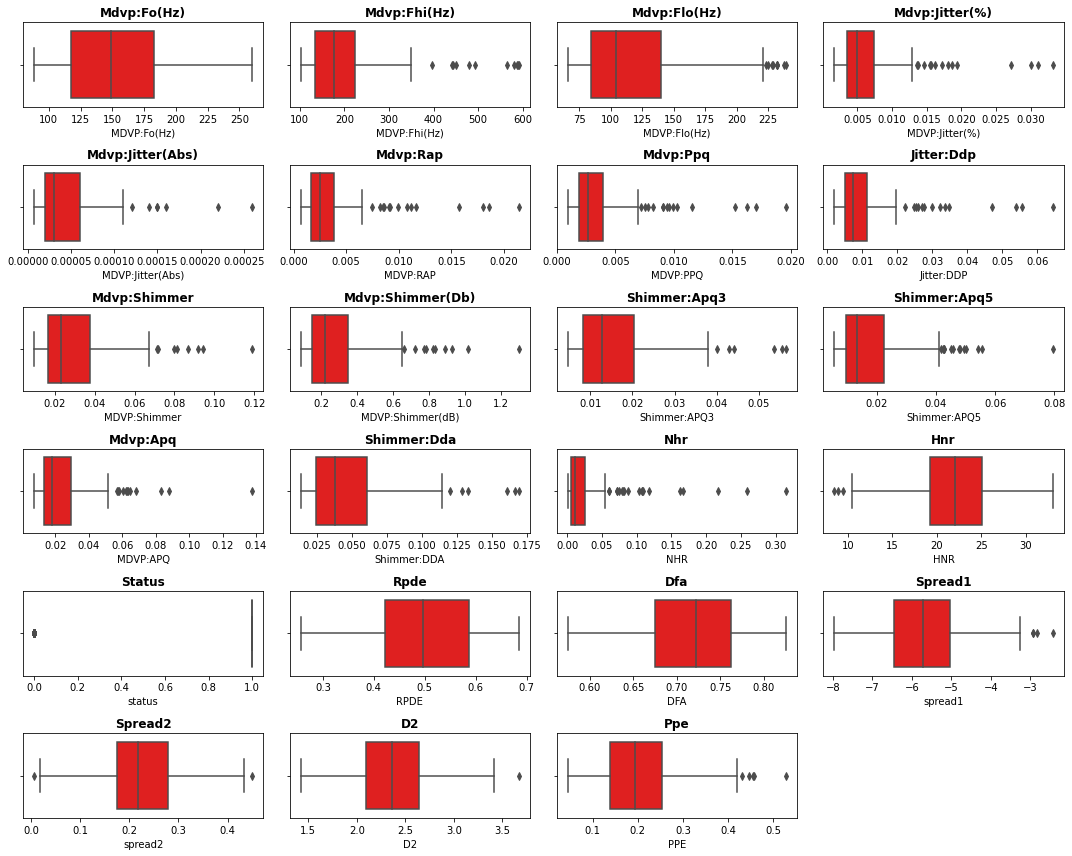

In [74]:
n=1
for i in df.describe().columns:
    plt.subplot(6,4,n)
    n+=1
    sns.boxplot(df[i],color='Red')
    plt.title(f'{i.title()}',weight='bold')
    plt.tight_layout()

### Q7. Are there any strong correlations among the independent features?

<AxesSubplot:>

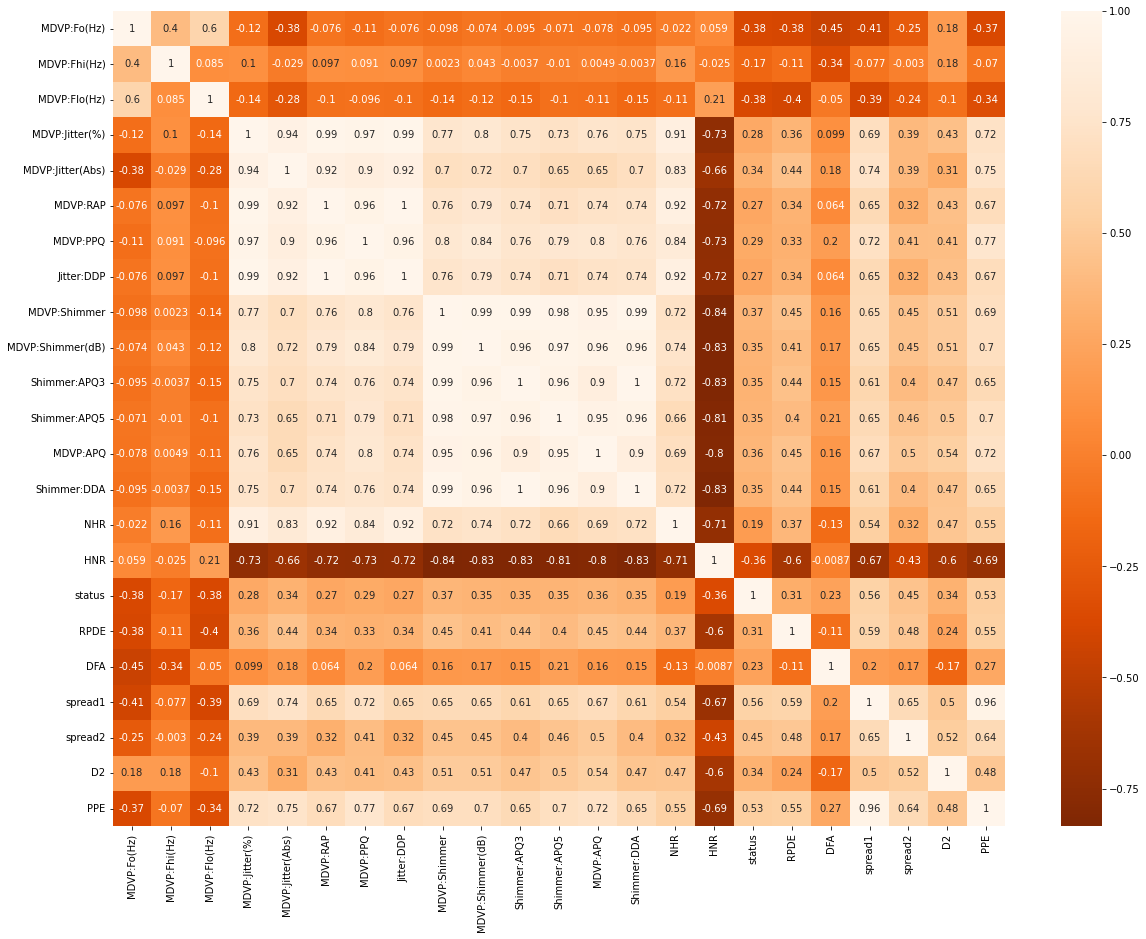

In [80]:
#plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot=True,cmap='Oranges_r')

Identifying the variables with a correlation greater than 0.6 and less than -0.6.

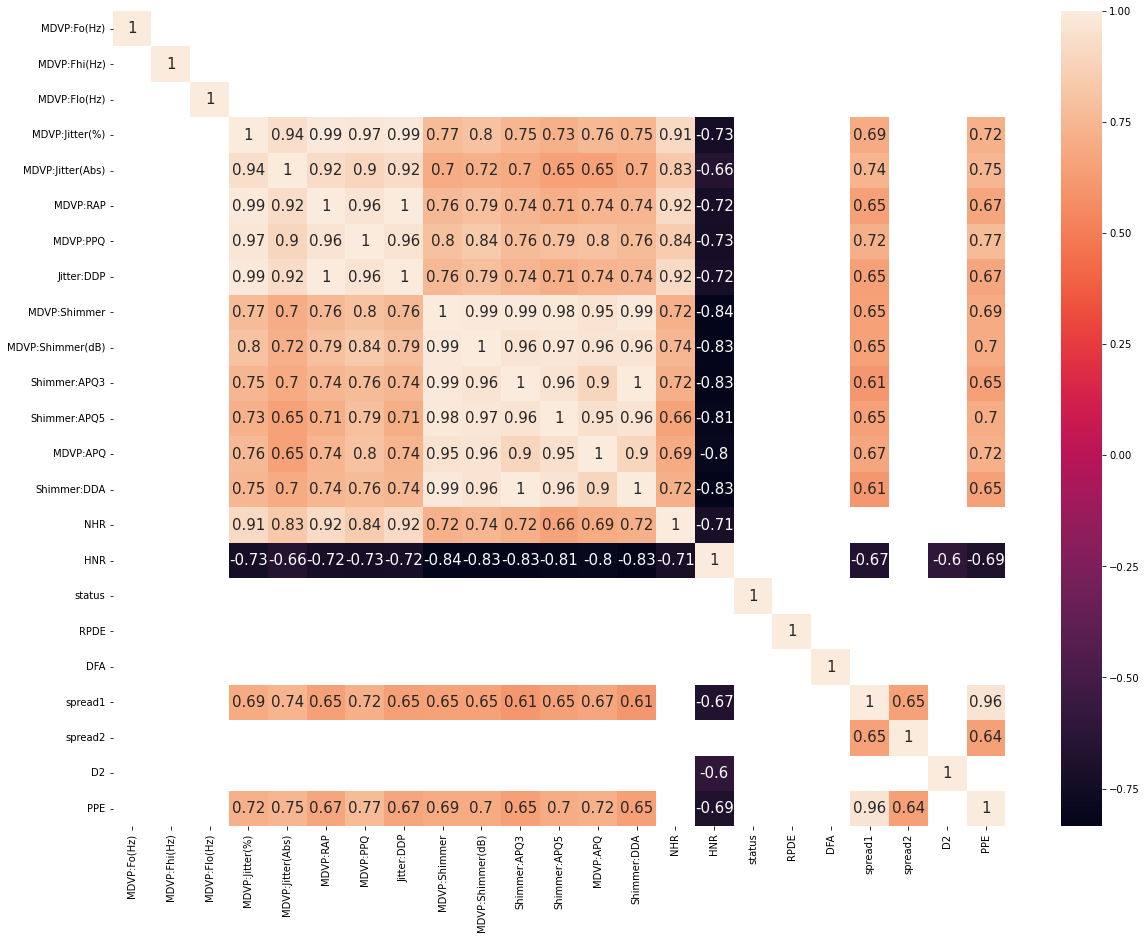

In [86]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr()[np.abs(df.corr())>0.6],annot=True ,annot_kws={'size':15})
plt.show()

**INFERENCE**: The above heatmap, show the variables having a strong positive/negative correlation. The variables with dark  shade represent the strong positive correlation and the ones with lighter shade represent the strong negative correlation.

### Q8. Split dataset into training & test dataset  

In [91]:
df.drop(columns='name',inplace=True)

In [92]:
#separating  target and independent variable
df_features=df.drop('status',axis=1)
df_target=df['status']

In [93]:
#splitting data into train and test subset
x_train, x_test,y_train,y_test=train_test_split(df_features,df_target,test_size=0.3,random_state=2)
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)

x_train (136, 22)
y_train (136,)
x_test (59, 22)
y_test (59,)


### Q9. Create a default decision tree model using criterion = Entropy 

In [95]:
#intiating DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
#fiting the model on training data using fit()
model_dtc=dtc.fit(x_train,y_train)

In [96]:
#predicting target variable
y_test_pred_default=model_dtc.predict(x_test)

In [98]:
#pulling classification report
print(classification_report(y_test,y_test_pred_default))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.89      0.87      0.88        47

    accuracy                           0.81        59
   macro avg       0.71      0.73      0.72        59
weighted avg       0.82      0.81      0.82        59



### Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [131]:
#intiating DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=10)
#fiting the model on training data using fit()
model_dtc_reg=dtc.fit(x_train,y_train)

In [132]:
#predicting target variable
y_test_pred_reg=model_dtc_reg.predict(x_test)

In [133]:
#pulling classification report
print(classification_report(y_test,y_test_pred_reg))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.91      0.87      0.89        47

    accuracy                           0.83        59
   macro avg       0.74      0.77      0.75        59
weighted avg       0.84      0.83      0.84        59



In [ ]:
#model accuracy has been increased

### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [137]:
#creating Dataframe of hyperparameters and its values
tuned_parameters={'n_estimators':[100,120,130,140,150,200]}
rfc=RandomForestClassifier()
#using Gridsearch cv to find optimal value of hyperparameter
grid_rfc=GridSearchCV(estimator=rfc,param_grid=tuned_parameters)
#fiting the model on training data using fit()
rfc_model=grid_rfc.fit(x_train,y_train)
print('best_parameters',rfc_model.best_params_)

best_parameters {'n_estimators': 120}
